<a href="https://colab.research.google.com/github/jessk816/ca-energy/blob/main/IE7275_Project_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
!pip install --upgrade openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install --upgrade plotly
!pip install --upgrade geopandas
!pip install --upgrade pyshp
!pip install --upgrade shapely

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.3 MB 325 kB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 13.5 MB/s 
     |████████████████████████████████| 7.8 MB 64.5 MB/s 
     |████████████████████████████████| 16.6 MB 99 kB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 46 kB 3.9 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! pip install numpy scikit-learn statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
from typing import Tuple
import math
from math import sqrt

In [ ]:
import sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import MDS
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import datasets, linear_model, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from sklearn import neighbors
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import prediction_error
from yellowbrick.regressor import PredictionError

# Data

In [ ]:
# Load the dataset
from google.colab import files
file = files.upload()  # upload file into google colab session
df1 = pd.read_csv("yearly_generation.csv") 
df1.head()

Saving yearly_generation.csv to yearly_generation.csv


,PlantClass,Aging,Year,State,CECPlantID,Unit,Status,StartDate,PrimeMoverID,PrimeMoverDesc,Capacity,NetGWh,NetMWh,PriFuelUseMMBTU,PriEnergySource,EnergyType,Description
0,C,0,2001,CA,C0019,GEN2,OP,12/1/1954 0:00,CA,Combined Cycle - Steam Turbine portion,12.0,61.81,61811.0,0.0,BIT,Coal,"Anthracite Coal, Bituminous Coal"
1,C,0,2002,CA,C0019,GEN2,OP,12/1/1954 0:00,CA,Combined Cycle - Steam Turbine portion,12.0,77.81,77814.0,0.0,BIT,Coal,"Anthracite Coal, Bituminous Coal"
2,C,0,2003,CA,C0019,GEN2,OP,12/1/1954 0:00,CA,Combined Cycle - Steam Turbine portion,12.0,75.17,75166.0,0.0,BIT,Coal,"Anthracite Coal, Bituminous Coal"
3,C,0,2004,CA,C0019,GEN2,OP,12/1/1954 0:00,CA,Combined Cycle - Steam Turbine portion,12.0,69.60,69600.0,0.0,BIT,Coal,"Anthracite Coal, Bituminous Coal"
4,C,0,2005,CA,C0019,GEN2,OP,12/1/1954 0:00,CA,Combined Cycle - Steam Turbine portion,12.0,73.72,73719.0,0.0,BIT,Coal,"Anthracite Coal, Bituminous Coal"


In [ ]:
df1.describe()

,Aging,Year,Capacity,NetGWh,NetMWh,PriFuelUseMMBTU
count,35639.000000,35639.000000,35639.000000,35639.000000,3.563900e+04,3.563900e+04
mean,0.042061,2012.415921,46.305938,133.010245,1.330102e+05,8.516706e+05
std,0.200730,5.981329,118.076669,514.578159,5.145782e+05,4.305602e+06
min,0.000000,2001.000000,0.000000,-685.760000,-6.857590e+05,0.000000e+00
25%,0.000000,2007.000000,2.000000,2.190000,2.192000e+03,0.000000e+00
50%,0.000000,2013.000000,10.000000,14.520000,1.452000e+04,0.000000e+00
75%,0.000000,2018.000000,48.000000,92.660000,9.265800e+04,1.779840e+05
max,1.000000,2021.000000,5650.200000,11705.670000,1.170567e+07,1.074378e+08


In [ ]:
df1.shape

(35639, 17)

In [ ]:
# count the number of NaN values in each column
print(df1.isnull().sum())

PlantClass         0
Aging              0
Year               0
State              0
CECPlantID         0
Unit               0
Status             0
StartDate          0
PrimeMoverID       0
PrimeMoverDesc     0
Capacity           0
NetGWh             0
NetMWh             0
PriFuelUseMMBTU    0
PriEnergySource    0
EnergyType         0
Description        0
dtype: int64


Since there are no null values, the data cleaning process is done.

In [ ]:
# Load the dataset
from google.colab import files
file = files.upload()  # upload file into google colab session
df2 = pd.read_csv("plant_description.csv") 
df2.head()

Saving plant_description.csv to plant_description.csv


,CompanyName,CECPlantID,PlantName,City,County,State
0,ACE Cogeneration Co,C0001,ACE Cogeneration (ACE is Argus Cogen Expansion...,Trona,San Bernardino,CA
1,Tesoro Refining & Marketing Company LLC,C0002,Los Angeles Refinery - Calciner,Long Beach,Los Angeles,CA
2,DTE Stockton LLC,C0004,Port of Stockton District Energy Facility - Re...,Stockton,San Joaquin,CA
3,Jackson Valley Energy Part LP,C0005,Buena Vista Biomass Power (Jackson Valley) Ret...,Ione,Amador,CA
4,Hanford LP,C0007,Hanford - Retired October 2011,Hanford,Kings,CA


In [ ]:
df2.describe()

,CompanyName,CECPlantID,PlantName,City,County,State
count,1799,1799,1799,1799,1799,1799
unique,537,1799,1792,496,65,5
top,Not Available,C0001,Google Inc.,Unincorporated,Los Angeles,CA
freq,359,1,2,172,235,1778


In [ ]:
df2.shape

(1799, 6)

In [ ]:
# count the number of NaN values in each column
print(df2.isnull().sum())

CompanyName    0
CECPlantID     0
PlantName      0
City           0
County         0
State          0
dtype: int64


Since there are no null values, the data cleaning process is done.

In [ ]:
# combine data by CECPlantID with inner join
df = pd.merge(df2, df1, how="inner", on=["CECPlantID", "CECPlantID"])
df.head()

,CompanyName,CECPlantID,PlantName,City,County,State_x,PlantClass,Aging,Year,State_y,...,StartDate,PrimeMoverID,PrimeMoverDesc,Capacity,NetGWh,NetMWh,PriFuelUseMMBTU,PriEnergySource,EnergyType,Description
0,ACE Cogeneration Co,C0001,ACE Cogeneration (ACE is Argus Cogen Expansion...,Trona,San Bernardino,CA,C,0,2013,CA,...,12/1/1990 0:00,ST,Steam Turbine,108.0,320.20,320201.13,4204379.13,BIT,Coal,"Anthracite Coal, Bituminous Coal"
1,ACE Cogeneration Co,C0001,ACE Cogeneration (ACE is Argus Cogen Expansion...,Trona,San Bernardino,CA,C,0,2014,CA,...,12/1/1990 0:00,ST,Steam Turbine,108.0,333.21,333205.04,4596524.02,BIT,Coal,"Anthracite Coal, Bituminous Coal"
2,ACE Cogeneration Co,C0001,ACE Cogeneration (ACE is Argus Cogen Expansion...,Trona,San Bernardino,CA,C,0,2005,CA,...,12/1/1990 0:00,ST,Steam Turbine,108.0,764.48,764480.00,6893458.00,BIT,Coal,"Anthracite Coal, Bituminous Coal"
3,ACE Cogeneration Co,C0001,ACE Cogeneration (ACE is Argus Cogen Expansion...,Trona,San Bernardino,CA,C,0,2003,CA,...,12/1/1990 0:00,ST,Steam Turbine,108.0,757.16,757155.00,7253127.00,BIT,Coal,"Anthracite Coal, Bituminous Coal"
4,ACE Cogeneration Co,C0001,ACE Cogeneration (ACE is Argus Cogen Expansion...,Trona,San Bernardino,CA,C,0,2012,CA,...,12/1/1990 0:00,ST,Steam Turbine,108.0,555.44,555437.00,7613376.00,BIT,Coal,"Anthracite Coal, Bituminous Coal"


# Dimension Reduction

In [ ]:
df = df.drop(['State_y'], axis=1)
df = df.rename(columns={"State_x": "State"})
df.head()

,CompanyName,CECPlantID,PlantName,City,County,State,PlantClass,Aging,Year,Unit,...,StartDate,PrimeMoverID,PrimeMoverDesc,Capacity,NetGWh,NetMWh,PriFuelUseMMBTU,PriEnergySource,EnergyType,Description
0,ACE Cogeneration Co,C0001,ACE Cogeneration (ACE is Argus Cogen Expansion...,Trona,San Bernardino,CA,C,0,2013,GEN 1,...,12/1/1990 0:00,ST,Steam Turbine,108.0,320.20,320201.13,4204379.13,BIT,Coal,"Anthracite Coal, Bituminous Coal"
1,ACE Cogeneration Co,C0001,ACE Cogeneration (ACE is Argus Cogen Expansion...,Trona,San Bernardino,CA,C,0,2014,GEN 1,...,12/1/1990 0:00,ST,Steam Turbine,108.0,333.21,333205.04,4596524.02,BIT,Coal,"Anthracite Coal, Bituminous Coal"
2,ACE Cogeneration Co,C0001,ACE Cogeneration (ACE is Argus Cogen Expansion...,Trona,San Bernardino,CA,C,0,2005,GEN 1,...,12/1/1990 0:00,ST,Steam Turbine,108.0,764.48,764480.00,6893458.00,BIT,Coal,"Anthracite Coal, Bituminous Coal"
3,ACE Cogeneration Co,C0001,ACE Cogeneration (ACE is Argus Cogen Expansion...,Trona,San Bernardino,CA,C,0,2003,GEN 1,...,12/1/1990 0:00,ST,Steam Turbine,108.0,757.16,757155.00,7253127.00,BIT,Coal,"Anthracite Coal, Bituminous Coal"
4,ACE Cogeneration Co,C0001,ACE Cogeneration (ACE is Argus Cogen Expansion...,Trona,San Bernardino,CA,C,0,2012,GEN 1,...,12/1/1990 0:00,ST,Steam Turbine,108.0,555.44,555437.00,7613376.00,BIT,Coal,"Anthracite Coal, Bituminous Coal"


In [ ]:
df.describe()

,Aging,Year,Capacity,NetGWh,NetMWh,PriFuelUseMMBTU
count,35639.000000,35639.000000,35639.000000,35639.000000,3.563900e+04,3.563900e+04
mean,0.042061,2012.415921,46.305938,133.010245,1.330102e+05,8.516706e+05
std,0.200730,5.981329,118.076669,514.578159,5.145782e+05,4.305602e+06
min,0.000000,2001.000000,0.000000,-685.760000,-6.857590e+05,0.000000e+00
25%,0.000000,2007.000000,2.000000,2.190000,2.192000e+03,0.000000e+00
50%,0.000000,2013.000000,10.000000,14.520000,1.452000e+04,0.000000e+00
75%,0.000000,2018.000000,48.000000,92.660000,9.265800e+04,1.779840e+05
max,1.000000,2021.000000,5650.200000,11705.670000,1.170567e+07,1.074378e+08


In [ ]:
df.dtypes

CompanyName         object
CECPlantID          object
PlantName           object
City                object
County              object
State               object
PlantClass          object
Aging                int64
Year                 int64
Unit                object
Status              object
StartDate           object
PrimeMoverID        object
PrimeMoverDesc      object
Capacity           float64
NetGWh             float64
NetMWh             float64
PriFuelUseMMBTU    float64
PriEnergySource     object
EnergyType          object
Description         object
dtype: object

In [ ]:
df.shape

(35639, 21)

### Heatmap

In [ ]:
df.corr()

,Aging,Year,Capacity,NetGWh,NetMWh,PriFuelUseMMBTU
Aging,1.000000,-0.129977,0.380970,0.187926,0.187926,0.211035
Year,-0.129977,1.000000,-0.046152,-0.064700,-0.064700,-0.068563
Capacity,0.380970,-0.046152,1.000000,0.714368,0.714368,0.518623
NetGWh,0.187926,-0.064700,0.714368,1.000000,1.000000,0.863902
NetMWh,0.187926,-0.064700,0.714368,1.000000,1.000000,0.863902
PriFuelUseMMBTU,0.211035,-0.068563,0.518623,0.863902,0.863902,1.000000


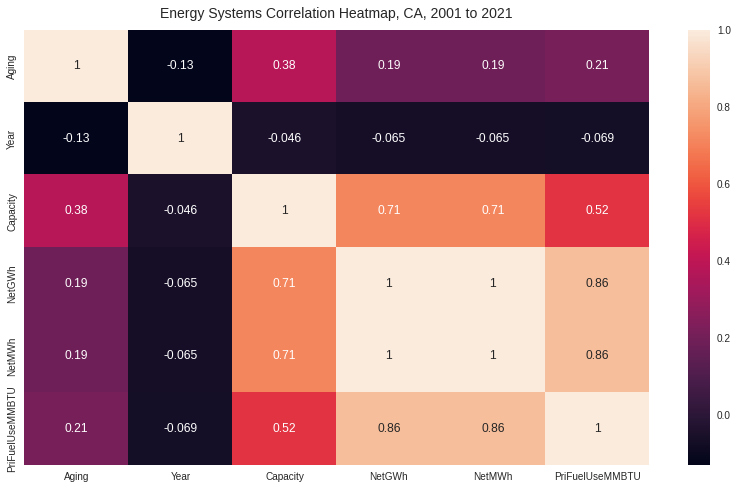

In [ ]:
# double check dates in title!
plt.figure(figsize=(14, 8))
heatmap = sns.heatmap(df.corr(), annot=True)
heatmap.set_title('Energy Systems Correlation Heatmap, CA, 2001 to 2021', fontdict={'fontsize':14}, pad=12);

### Drop NetGWh

In [ ]:
df = df.drop(['NetGWh'], axis=1)
df.head()

,CompanyName,CECPlantID,PlantName,City,County,State,PlantClass,Aging,Year,Unit,Status,StartDate,PrimeMoverID,PrimeMoverDesc,Capacity,NetMWh,PriFuelUseMMBTU,PriEnergySource,EnergyType,Description
0,ACE Cogeneration Co,C0001,ACE Cogeneration (ACE is Argus Cogen Expansion...,Trona,San Bernardino,CA,C,0,2013,GEN 1,OP,12/1/1990 0:00,ST,Steam Turbine,108.0,320201.13,4204379.13,BIT,Coal,"Anthracite Coal, Bituminous Coal"
1,ACE Cogeneration Co,C0001,ACE Cogeneration (ACE is Argus Cogen Expansion...,Trona,San Bernardino,CA,C,0,2014,GEN 1,RE,12/1/1990 0:00,ST,Steam Turbine,108.0,333205.04,4596524.02,BIT,Coal,"Anthracite Coal, Bituminous Coal"
2,ACE Cogeneration Co,C0001,ACE Cogeneration (ACE is Argus Cogen Expansion...,Trona,San Bernardino,CA,C,0,2005,GEN 1,OP,12/1/1990 0:00,ST,Steam Turbine,108.0,764480.00,6893458.00,BIT,Coal,"Anthracite Coal, Bituminous Coal"
3,ACE Cogeneration Co,C0001,ACE Cogeneration (ACE is Argus Cogen Expansion...,Trona,San Bernardino,CA,C,0,2003,GEN 1,OP,12/1/1990 0:00,ST,Steam Turbine,108.0,757155.00,7253127.00,BIT,Coal,"Anthracite Coal, Bituminous Coal"
4,ACE Cogeneration Co,C0001,ACE Cogeneration (ACE is Argus Cogen Expansion...,Trona,San Bernardino,CA,C,0,2012,GEN 1,OP,12/1/1990 0:00,ST,Steam Turbine,108.0,555437.00,7613376.00,BIT,Coal,"Anthracite Coal, Bituminous Coal"


# Dimension Reduction, Pt. 2

### Eigenvalues of Raw Data

In [ ]:
# reduce df to float variables
df4 = df[['Capacity', 'NetMWh', 'PriFuelUseMMBTU']]
df4.head()

,Capacity,NetMWh,PriFuelUseMMBTU
0,108.0,320201.13,4204379.13
1,108.0,333205.04,4596524.02
2,108.0,764480.00,6893458.00
3,108.0,757155.00,7253127.00
4,108.0,555437.00,7613376.00


In [ ]:
X = df4 # coefficient matrix
y = df4['NetMWh'] # dependent variables

In [ ]:
# eigenvalues without standarization
LA.lstsq(X, y, rcond=None)

(array([2.09585409e-11, 1.00000000e+00, 5.55111512e-16]),
 array([9.62865972e-18]),
 3,
 array([8.33154153e+08, 4.93601742e+07, 1.55704322e+04]))

### PCA on Raw Data

In [ ]:
# PCA on raw data
# 99% of variance
pca = PCA(n_components=0.99)
pca.fit(X)
reduced = pca.transform(X)

In [ ]:
print('Principle Components:')
print(pca.components_)

Principle Components:
[[1.42359569e-05 1.03067691e-01 9.94674344e-01]]


In [ ]:
print("Explained Variance:")
print(pca.explained_variance_)

Explained Variance:
[1.87365391e+13]


In [ ]:
print("Proportion of Variance Explained:")
print(pca.explained_variance_ratio_)

Proportion of Variance Explained:
[0.99646549]


In [ ]:
cum_explained_var = []
for i in range(0, len(pca.explained_variance_ratio_)):
    if i == 0:
        cum_explained_var.append(pca.explained_variance_ratio_[i])
    else:
        cum_explained_var.append(pca.explained_variance_ratio_[i] + 
                                 cum_explained_var[i-1])

print("Cumulative Prop. Variance Explained:")
print(cum_explained_var)

Cumulative Prop. Variance Explained:
[0.9964654895795816]


### Standarize Data

In [ ]:
# Standarize dataset
sc = StandardScaler()
X_std = sc.fit_transform(X)

In [ ]:
# Instantiate PCA
pca = PCA()

# Determine transformed features
X_pca = pca.fit_transform(X_std)

### PCA on Standarized Data

In [ ]:
# 99% of variance
pca = PCA(n_components=0.99)
pca.fit(X)
reduced = pca.transform(X)

In [ ]:
print('Principle Components:')
print(pca.components_)

Principle Components:
[[1.42359569e-05 1.03067691e-01 9.94674344e-01]]


In [ ]:
print("Explained Variance:")
print(pca.explained_variance_)

Explained Variance:
[1.87365391e+13]


In [ ]:
print("Proportion of Variance Explained:")
print(pca.explained_variance_ratio_)

Proportion of Variance Explained:
[0.99646549]


In [ ]:
cum_explained_var = []
for i in range(0, len(pca.explained_variance_ratio_)):
    if i == 0:
        cum_explained_var.append(pca.explained_variance_ratio_[i])
    else:
        cum_explained_var.append(pca.explained_variance_ratio_[i] + 
                                 cum_explained_var[i-1])

print("Cumulative Prop. Variance Explained:")
print(cum_explained_var)

Cumulative Prop. Variance Explained:
[0.9964654895795816]


### Plot First 2 PCs

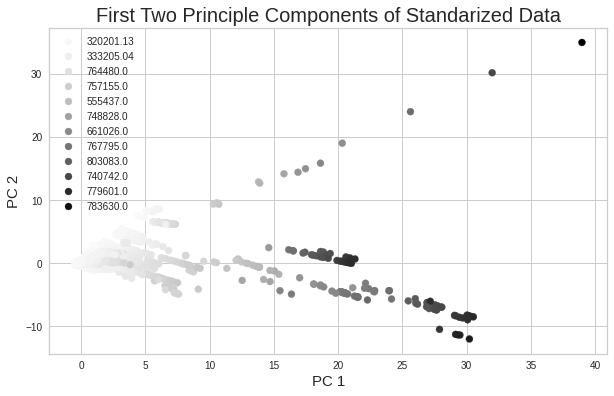

In [ ]:
fig = plt.figure(figsize = (10,6))
plot = plt.scatter(X_pca[:,0], X_pca[:,1], c=y)
#fig = px.scatter(X_std, x=0, y=1, color=df['EnergyType'])
plt.legend(handles=plot.legend_elements()[0], labels=list(df4['NetMWh']))
plt.xlabel("PC 1", fontsize=15)
plt.ylabel("PC 2", fontsize=15)
plt.title('First Two Principle Components of Standarized Data', fontsize=20)
plt.show()

### MDS on Standarized Data

In [ ]:
# run MDS
embedding = MDS()
df4_transformed = embedding.fit_transform(df4[:100])

print("Transformed shape of df6_1:")
df4_transformed.shape

Transformed shape of df6_1:


(100, 2)

In [ ]:
df4_transformed

array([[-1281817.57718526,   324843.24073736],
       [-1684507.94460288,   310148.41025584],
       [-3934643.21489912,   930224.62667882],
       [-4282598.30017647,  1009982.74449914],
       [-4663431.75987956,   836457.6971897 ],
       [-5029152.38494909,  1049639.87763803],
       [-5246655.81651904,   974406.05173793],
       [-5960087.25626173,  1041140.49007046],
       [-6211324.17434696,  1188990.22874731],
       [-6217235.75533383,  1138290.39914034],
       [-6276749.63324364,  1159668.14633495],
       [-6510708.25671112,  1167663.51137194],
       [-6558231.44764191,  1160670.37364316],
       [-6858046.59649392,  1117969.28213831],
       [  -19968.69081038,    22626.48208708],
       [  -42859.94001729,    13125.61366702],
       [  -50145.55704952,    38557.37114422],
       [ -113999.59480959,    40734.51233767],
       [ -131369.43894518,    46515.54191101],
       [ -220158.74502668,    77478.6114249 ],
       [ -276046.2880829 ,    78228.22645514],
       [ -324

### Plot of MDS

/usr/local/lib/python3.8/dist-packages/matplotlib/collections.py:988: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


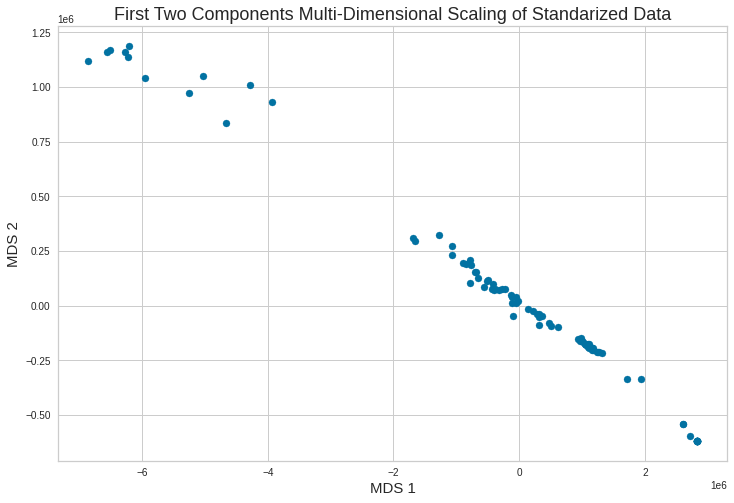

In [ ]:
fig = plt.figure(figsize = (12,8))
plot = plt.scatter(df4_transformed[:,0], df4_transformed[:,1])
plt.legend(handles=plot.legend_elements()[0], labels=list(df4))
plt.xlabel("MDS 1", fontsize=15)
plt.ylabel("MDS 2", fontsize=15)
plt.title('First Two Components Multi-Dimensional Scaling of Standarized Data', fontsize=18)
plt.show()

# Data Visualization

### Scatterplot, NetMWh vs. Year

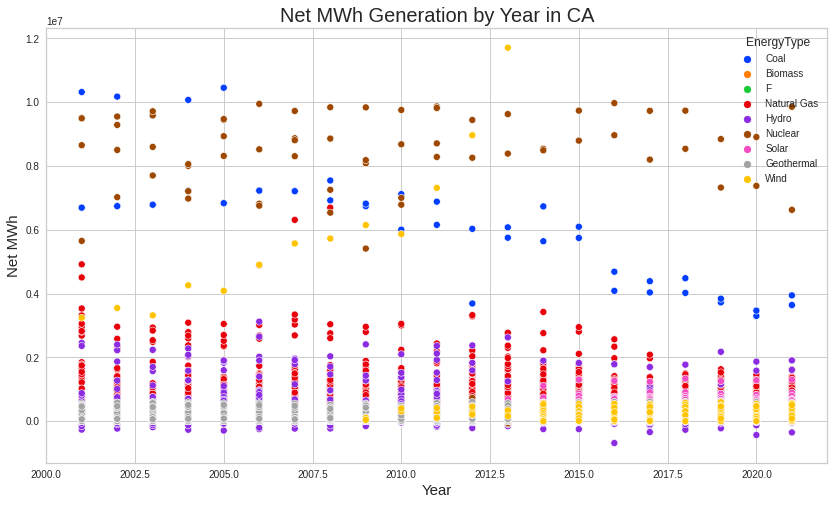

In [ ]:
plt.figure(figsize=(14, 8))
sns.scatterplot(data=df, x='Year', y='NetMWh', hue='EnergyType', palette='bright')

# label chart and axes
plt.title("Net MWh Generation by Year in CA", fontsize=20)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Net MWh", fontsize=15)

plt.show()

### Line Graph, NetMWh vs. Year

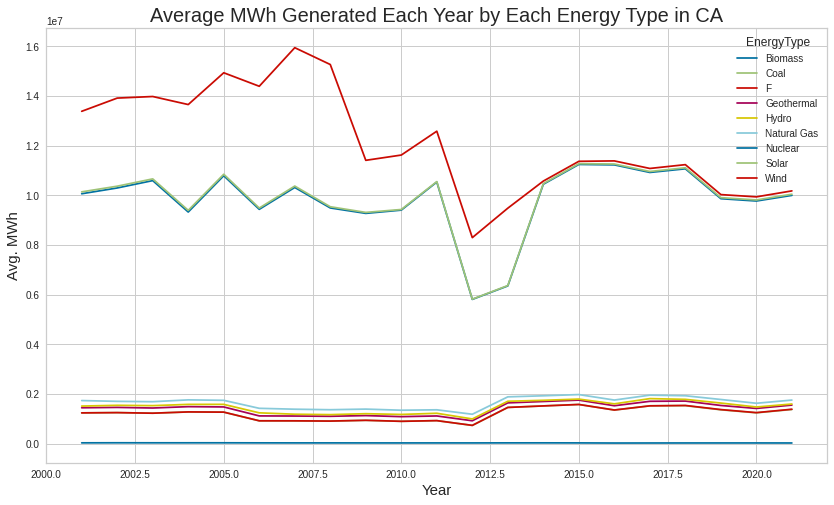

In [ ]:
# average NetMWh by Year
df.groupby(['Year', 'EnergyType'])['NetMWh'].mean().unstack().plot(kind='line', stacked=True, figsize=(14, 8))

# label chart and axes
plt.title("Average MWh Generated Each Year by Each Energy Type in CA", fontsize=20)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Avg. MWh", fontsize=15)

plt.show()

### Scatterplot, Capacity vs. NetMWh

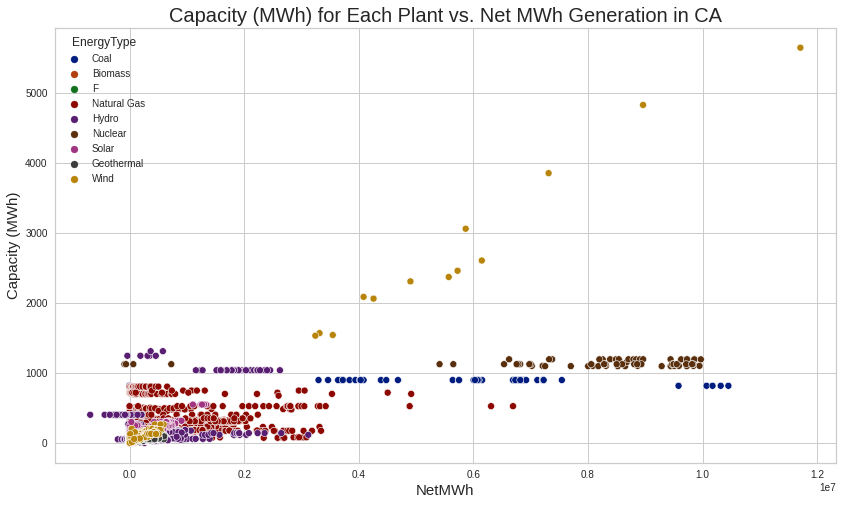

In [ ]:
plt.figure(figsize=(14, 8))
sns.scatterplot(data=df, x='NetMWh', y='Capacity', hue='EnergyType', palette='dark')

# label chart and axes
plt.title("Capacity (MWh) for Each Plant vs. Net MWh Generation in CA", fontsize=20)
plt.xlabel("NetMWh", fontsize=15)
plt.ylabel("Capacity (MWh)", fontsize=15)

plt.show()

### Scatterplot, PriFuelUseMMBTU vs. NetMWh

---



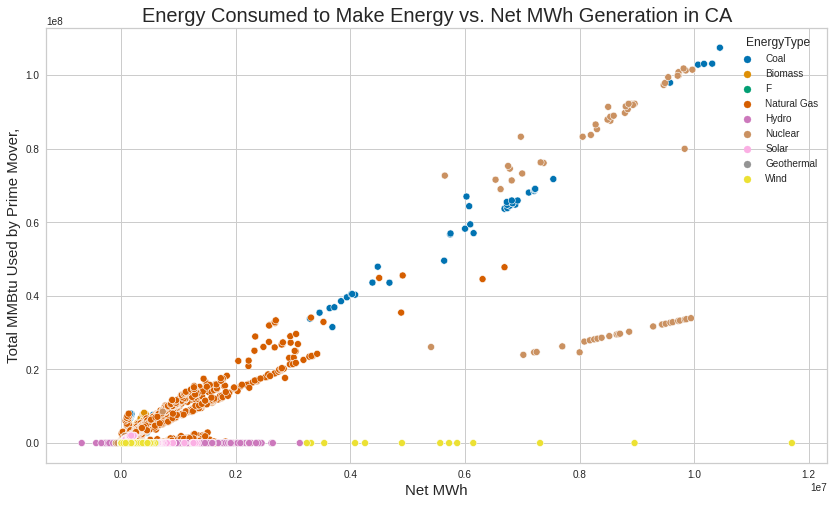

In [ ]:
plt.figure(figsize=(14, 8))
sns.scatterplot(data=df, y='PriFuelUseMMBTU', x='NetMWh', hue='EnergyType', palette='colorblind')

# label chart and axes
plt.title("Energy Consumed to Make Energy vs. Net MWh Generation in CA", fontsize=20)
plt.ylabel("Total MMBtu Used by Prime Mover,", fontsize=15)
plt.xlabel("Net MWh", fontsize=15)

plt.show()

### Averages by Year, by Energy Type

In [ ]:
# average NetMWh for each EnergyType every year
avg_mwh = df.groupby(['Year', 'EnergyType'])['NetMWh'].mean()
print(avg_mwh)

Year  EnergyType 
2001  Biomass        3.754423e+04
      Coal           1.206127e+06
      Geothermal     2.056546e+05
      Hydro          6.803558e+04
      Natural Gas    2.220134e+05
                         ...     
2021  Hydro          4.155169e+04
      Natural Gas    1.591869e+05
      Nuclear        8.238684e+06
      Solar          4.663977e+04
      Wind           1.339660e+05
Name: NetMWh, Length: 172, dtype: float64


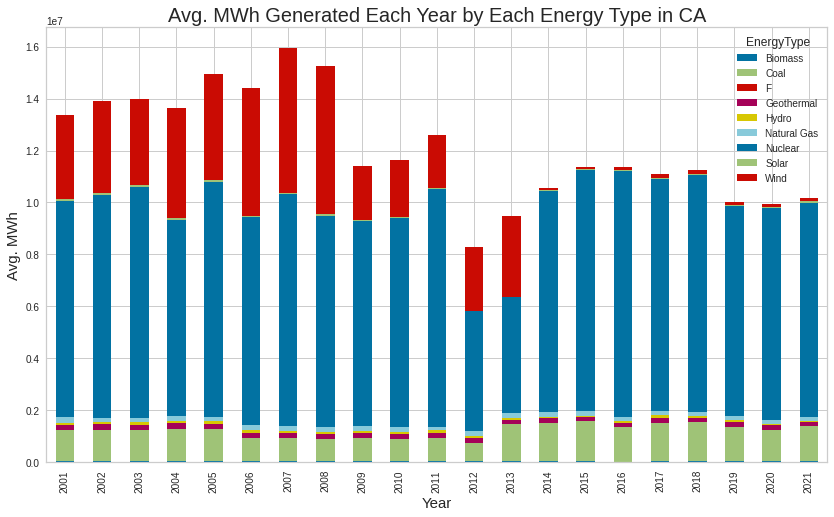

In [ ]:
df.groupby(['Year', 'EnergyType'])['NetMWh'].mean().unstack().plot(kind='bar', stacked=True, figsize=(14, 8))

# label chart and axes
plt.title("Avg. MWh Generated Each Year by Each Energy Type in CA", fontsize=20)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Avg. MWh", fontsize=15)

plt.show()

In [ ]:
# average PriFuelUseMMBTU for each EnergyType every year
avg_btu = df.groupby(['Year', 'EnergyType'])['PriFuelUseMMBTU'].mean()
print(avg_btu)

Year  EnergyType 
2001  Biomass        6.346386e+05
      Coal           1.226272e+07
      Geothermal     0.000000e+00
      Hydro          0.000000e+00
      Natural Gas    2.242340e+06
                         ...     
2021  Hydro          0.000000e+00
      Natural Gas    1.313800e+06
      Nuclear        8.512182e+07
      Solar          3.148814e+03
      Wind           0.000000e+00
Name: PriFuelUseMMBTU, Length: 172, dtype: float64


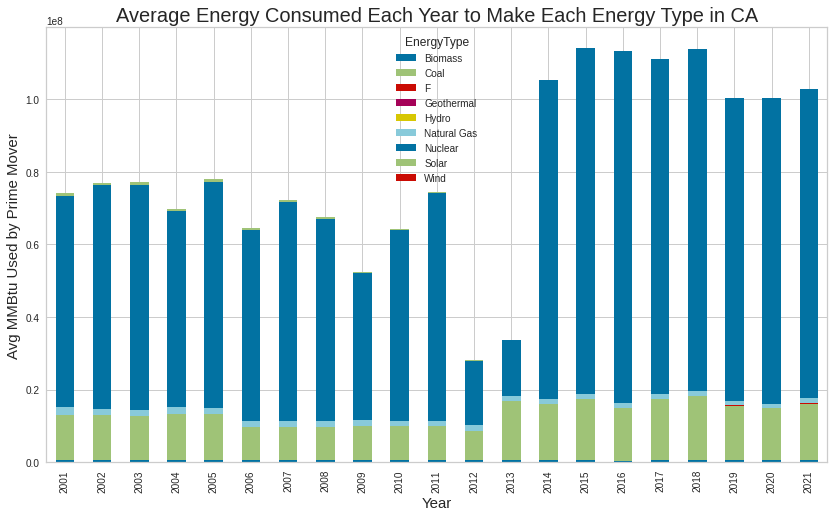

In [ ]:
df.groupby(['Year', 'EnergyType'])['PriFuelUseMMBTU'].mean().unstack().plot(kind='bar', stacked=True, figsize=(14, 8))

# label chart and axes
plt.title("Average Energy Consumed Each Year to Make Each Energy Type in CA", fontsize=20)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Avg MMBtu Used by Prime Mover", fontsize=15)

plt.show()

In [ ]:
# average Capacity for each EnergyType every year
avg_cap = df.groupby(['Year', 'EnergyType'])['Capacity'].mean()
print(avg_cap)

Year  EnergyType 
2001  Biomass           7.636104
      Coal            175.586957
      Geothermal       39.548529
      Hydro            35.817078
      Natural Gas      59.164810
                        ...     
2021  Hydro            37.062874
      Natural Gas      64.660498
      Nuclear        1196.500000
      Solar            20.782096
      Wind             55.700744
Name: Capacity, Length: 172, dtype: float64


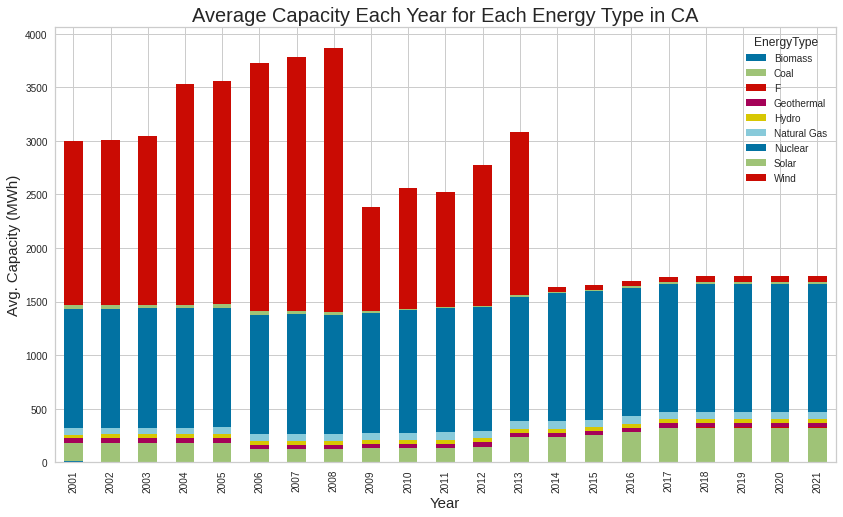

In [ ]:
df.groupby(['Year', 'EnergyType'])['Capacity'].mean().unstack().plot(kind='bar', stacked=True, figsize=(14, 8))

# label chart and axes
plt.title("Average Capacity Each Year for Each Energy Type in CA", fontsize=20)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Avg. Capacity (MWh)", fontsize=15)

plt.show()

### Stacked Bar Chart

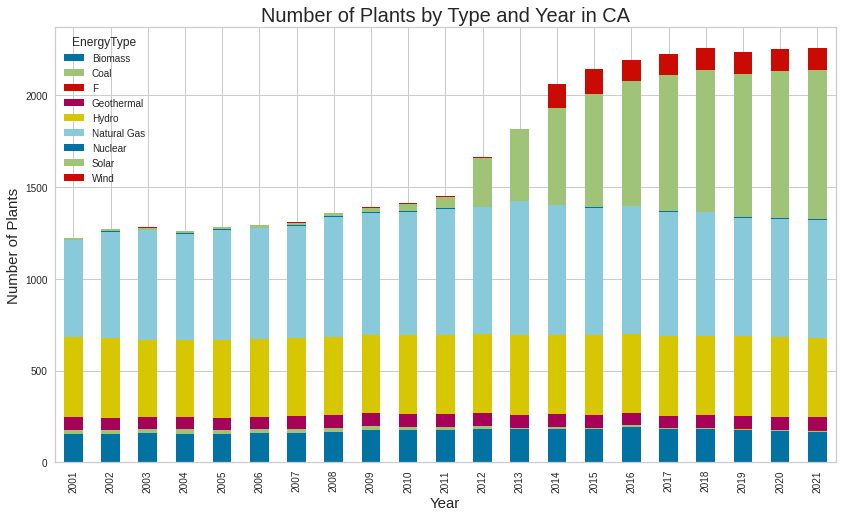

In [ ]:
df.groupby(['Year', 'EnergyType']).size().unstack().plot(kind='bar', stacked=True, figsize=(14, 8))

# label chart and axes
plt.title("Number of Plants by Type and Year in CA", fontsize=20)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Number of Plants", fontsize=15)

plt.show()

### Scatterplot Matrix

<Figure size 576x396 with 0 Axes>

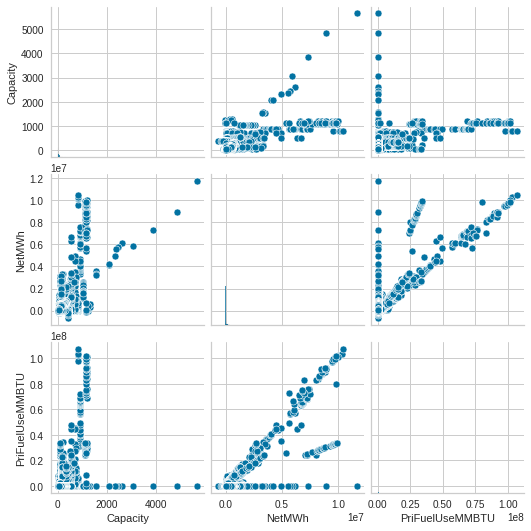

In [ ]:
plt.figure()
sns.pairplot(df, vars=['Capacity', 'NetMWh', 'PriFuelUseMMBTU'])
plt.show()

"PriFuelUseMMBTU" is Total MMBTU used by prime mover, i.e. energy consumed to make energy.

# Linear Regression

### Simple Linear Regression, NetMWh vs. Capacity (1)

In [ ]:
# define data
x1 = np.array(df['Capacity']).reshape((-1,1))
y1 = df['NetMWh']

print(x1.shape)
print(y1.shape)

(35639, 1)
(35639,)


In [ ]:
model1 = LinearRegression().fit(x1, y1)
r_sq1 = model1.score(x1, y1)

print(f"Coefficient of Determination: {r_sq1}")
print(f"Intercept: {model1.intercept_}")
print(f"Slope: {model1.coef_}")

Coefficient of Determination: 0.5103218259943221
Intercept: -11150.162240653328
Slope: [3113.21655486]


In [ ]:
# predict response
y_pred1 = model1.intercept_ + model1.coef_ * x1
print(f"Predicted Response:\n{y_pred1}")

mse1 = mean_squared_error(y1, y_pred1)
rmse1 = sqrt(mse1)
mae1 = mean_absolute_error(y1, y_pred1)

print('MSE: ',mse1)
print('RMSE: ',rmse1)
print('MAE: ',mae1)

Predicted Response:
[[ 325077.22568454]
 [ 325077.22568454]
 [ 325077.22568454]
 ...
 [4879713.0454489 ]
 [4764524.03291897]
 [6414528.80699629]]
MSE:  129658581553.62314
RMSE:  360081.3540765797
MAE:  108160.94461974688


### Simple Linear Regression, NetMWh vs. PriFuelUseMMBTU (2)

In [ ]:
# define data
x2 = np.array(df['PriFuelUseMMBTU']).reshape((-1,1))
y2 = df['NetMWh']

print(x2.shape)
print(y2.shape)

(35639, 1)
(35639,)


In [ ]:
model2 = LinearRegression().fit(x2, y2)
r_sq2 = model2.score(x2, y2)

print(f"Coefficient of Determination: {r_sq2}")
print(f"Intercept: {model2.intercept_}")
print(f"Slope: {model2.coef_}")

Coefficient of Determination: 0.7463264225679861
Intercept: 45076.91016364952
Slope: [0.10324806]


In [ ]:
# predict response
y_pred2 = model2.intercept_ + model2.coef_ * x2
print(f"Predicted Response:\n{y_pred2}")

mse2 = mean_squared_error(y2, y_pred2)
rmse2 = sqrt(mse2)
mae2 = mean_absolute_error(y2, y_pred2)

print('MSE: ',mse2)
print('RMSE: ',rmse2)
print('MAE: ',mae2)

Predicted Response:
[[479170.88728707]
 [519659.08534088]
 [756813.05641202]
 ...
 [ 45076.91016365]
 [ 45076.91016365]
 [ 45076.91016365]]
MSE:  67168515922.2284
RMSE:  259168.89458850652
MAE:  92014.65941612308


### Multiple Linear Regression (3)

In [ ]:
# define data
x3 = df[['Capacity', 'PriFuelUseMMBTU']]
y3 = df['NetMWh']

In [ ]:
model3 = LinearRegression().fit(x3, y3)
r_sq3 = model3.score(x3, y3)

print(f"Coefficient of Determination: {r_sq3}")
print(f"Intercept: {model3.intercept_}")
print(f"Coefficients: {model3.coef_}")

Coefficient of Determination: 0.8433554716093793
Intercept: -9211.38575068544
Coefficients: [1.58770699e+03 8.06665989e-02]


In [ ]:
y_pred3 = model3.predict(x3)
print(f"Predicted Response:\n{y_pred3}")

mse3 = mean_squared_error(y3, y_pred3)
rmse3 = sqrt(mse3)
mae3 = mean_absolute_error(y3, y_pred3)

print('MSE: ',mse3)
print('RMSE: ',rmse3)
print('MAE: ',mae3)

Predicted Response:
[ 501413.9346377   533046.92919716  718332.78130345 ... 2485076.30264554
 2426331.14384818 3267815.85094557]
MSE:  41476848341.27123
RMSE:  203658.6564358884
MAE:  72715.574859611


### Multiple Linear Regression (4)

In [ ]:
df2 = pd.get_dummies(df, columns=['PlantClass'])
df2.head()

,CompanyName,CECPlantID,PlantName,City,County,State,Aging,Year,Unit,Status,...,Description,PlantClass_C,PlantClass_E,PlantClass_F,PlantClass_G,PlantClass_H,PlantClass_N,PlantClass_S,PlantClass_T,PlantClass_W
0,ACE Cogeneration Co,C0001,ACE Cogeneration (ACE is Argus Cogen Expansion...,Trona,San Bernardino,CA,0,2013,GEN 1,OP,...,"Anthracite Coal, Bituminous Coal",1,0,0,0,0,0,0,0,0
1,ACE Cogeneration Co,C0001,ACE Cogeneration (ACE is Argus Cogen Expansion...,Trona,San Bernardino,CA,0,2014,GEN 1,RE,...,"Anthracite Coal, Bituminous Coal",1,0,0,0,0,0,0,0,0
2,ACE Cogeneration Co,C0001,ACE Cogeneration (ACE is Argus Cogen Expansion...,Trona,San Bernardino,CA,0,2005,GEN 1,OP,...,"Anthracite Coal, Bituminous Coal",1,0,0,0,0,0,0,0,0
3,ACE Cogeneration Co,C0001,ACE Cogeneration (ACE is Argus Cogen Expansion...,Trona,San Bernardino,CA,0,2003,GEN 1,OP,...,"Anthracite Coal, Bituminous Coal",1,0,0,0,0,0,0,0,0
4,ACE Cogeneration Co,C0001,ACE Cogeneration (ACE is Argus Cogen Expansion...,Trona,San Bernardino,CA,0,2012,GEN 1,OP,...,"Anthracite Coal, Bituminous Coal",1,0,0,0,0,0,0,0,0


In [ ]:
# define data
x4 = df2.select_dtypes(include='number')
y4 = df2['NetMWh']

In [ ]:
model4 = LinearRegression().fit(x4, y4)
r_sq4 = model4.score(x4, y4)

print(f"Coefficient of Determination: {r_sq4}")
print(f"Intercept: {model4.intercept_}")
print(f"Coefficients: {model4.coef_}")

Coefficient of Determination: 1.0
Intercept: 9.720679372549057e-09
Coefficients: [ 2.72895980e-10 -4.85612939e-12 -2.92667822e-12  1.00000000e+00
  0.00000000e+00  1.75661871e-10 -3.37076993e-11 -3.18330648e-11
 -3.27131105e-11 -3.40641000e-11  5.74967951e-11 -3.24938645e-11
 -3.48368641e-11 -3.35099625e-11]


In [ ]:
y_pred4 = model4.predict(x4)
print(f"Predicted Response:\n{y_pred4}")

mse4 = mean_squared_error(y4, y_pred4)
rmse4 = sqrt(mse4)
mae4 = mean_absolute_error(y4, y_pred4)

print('MSE: ',mse4)
print('RMSE: ',rmse4)
print('MAE: ',mae4)

Predicted Response:
[ 320201.13  333205.04  764480.   ... 3315596.   3242300.   4257823.  ]
MSE:  2.4145937861153914e-19
RMSE:  4.913851631984213e-10
MAE:  1.7698250245666315e-10


# LASSO Regression (5)

In [ ]:
# select only numerical values
df3 = df2.select_dtypes(include='number')

# split data, use df2 with dummy variables
x_train, x_test, y_train, y_test = train_test_split(df3, df3['NetMWh'], train_size=0.75)

# define data
x5 = np.array(x_train)
y5 = np.array(y_train)

print(x5.shape)
print(y5.shape)

(26729, 14)
(26729,)


In [ ]:
model5 = Lasso(alpha=1).fit(x5, y5)
r_sq5 = model5.score(x5, y5)

print(f"Coefficient of Determination: {r_sq5}")
print(f"Intercept: {model5.intercept_}")
print(f"Coefficients: {model5.coef_}")

Coefficient of Determination: 0.9999999999999969
Intercept: -0.001151399948867038
Coefficients: [-0.00000000e+00 -0.00000000e+00  2.24419661e-04  9.99999857e-01
  1.15170220e-08 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00]


In [ ]:
y_pred5 = model5.predict(x5)
print(f"Predicted Response:\n{y_pred5}")

mse5 = mean_squared_error(y5, y_pred5)
rmse5 = sqrt(mse5)
mae5 = mean_absolute_error(y5, y_pred5)

print('MSE: ',mse5)
print('RMSE: ',rmse5)
print('MAE: ',mae5)

Predicted Response:
[ 1.27493313e+05  1.79666311e-01  4.32471971e+05 ...  7.34780074e+04
  2.64160195e+05 -1.03919012e-03]
MSE:  0.0008251669990772785
RMSE:  0.028725720166381877
MAE:  0.01023272659528835


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


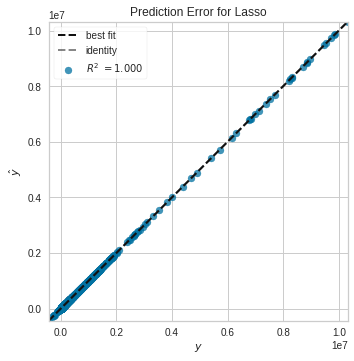

In [ ]:
visualizer = PredictionError(model5)
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.show()

# K-Nearest Neighbors

### k-NN Regression (6)

In [ ]:
# select only numerical values
df3 = df2.select_dtypes(include='number')

# split data, use df3 with dummy variables
x_train, x_test, y_train, y_test = train_test_split(df3, df3['NetMWh'], train_size=0.75)

# standarize dataset
scaler = MinMaxScaler(feature_range=(0, 1))

X_train = scaler.fit_transform(x_train)
x_train = pd.DataFrame(X_train)

X_test = scaler.fit_transform(x_test)
x_test = pd.DataFrame(X_test)

# rename columns on scaled data
col_names = ['Aging', 'Year', 'Capacity', 'NetMWh', 'PriFuelUseMMBTU', 'PlantClass_C', 'PlantClass_E',
             'PlantClass_F', 'PlantClass_G', 'PlantClass_H', 'PlantClass_N', 'PlantClass_S',
             'PlantClass_T', 'PlantClass_W']
scaled_df3_2 = pd.DataFrame(X_train, columns = col_names)
scaled_df3_2.describe().T

,count,mean,std,min,25%,50%,75%,max
Aging,26729.0,0.041752,0.200027,0.0,0.000000,0.000000,0.000000,1.0
Year,26729.0,0.568809,0.299075,0.0,0.300000,0.600000,0.850000,1.0
Capacity,26729.0,0.008205,0.021155,0.0,0.000354,0.001770,0.008495,1.0
NetMWh,26729.0,0.066312,0.043006,0.0,0.055521,0.056525,0.062900,1.0
PriFuelUseMMBTU,26729.0,0.008090,0.041065,0.0,0.000000,0.000000,0.001732,1.0
PlantClass_C,26729.0,0.008642,0.092563,0.0,0.000000,0.000000,0.000000,1.0
PlantClass_E,26729.0,0.103184,0.304204,0.0,0.000000,0.000000,0.000000,1.0
PlantClass_F,26729.0,0.000299,0.017298,0.0,0.000000,0.000000,0.000000,1.0
PlantClass_G,26729.0,0.378316,0.484976,0.0,0.000000,0.000000,1.000000,1.0
PlantClass_H,26729.0,0.254667,0.435682,0.0,0.000000,0.000000,1.000000,1.0


In [ ]:
mse6 = []
rmse6 = []

for k in range(20):
    k = k+1
    model6 = neighbors.KNeighborsRegressor(n_neighbors=k).fit(x_train, y_train)
    y_pred6 = model6.predict(x_test)
    # errors
    error1 = mean_squared_error(y_test, y_pred6)
    error2 = sqrt(error1)
    # add errors to lists
    mse6.append(error1)
    rmse6.append(error2)

    print('k=',k)
    print('MSE: ',error1)
    print('RMSE: ',error2)

k= 1
MSE:  10485898031.732155
RMSE:  102400.67398084914
k= 2
MSE:  8921641139.564747
RMSE:  94454.43949103053
k= 3
MSE:  10001064900.11304
RMSE:  100005.32435882122
k= 4
MSE:  10175748157.618694
RMSE:  100874.91342062551
k= 5
MSE:  11241619076.207756
RMSE:  106026.5017635108
k= 6
MSE:  11939951447.285181
RMSE:  109270.08486903075
k= 7
MSE:  12744447111.089115
RMSE:  112891.3066231812
k= 8
MSE:  13492054867.554976
RMSE:  116155.304947966
k= 9
MSE:  14636732226.271105
RMSE:  120982.36328602242
k= 10
MSE:  15146506510.25511
RMSE:  123071.14410069937
k= 11
MSE:  16105081084.555159
RMSE:  126905.79610307465
k= 12
MSE:  17002279286.483313
RMSE:  130392.78847575626
k= 13
MSE:  18003700900.53861
RMSE:  134177.87038307998
k= 14
MSE:  18815407711.4137
RMSE:  137169.26664312856
k= 15
MSE:  19751792210.30673
RMSE:  140541.06947902
k= 16
MSE:  20612839651.59942
RMSE:  143571.72302232575
k= 17
MSE:  21599763249.538727
RMSE:  146968.57912335795
k= 18
MSE:  22609495499.760277
RMSE:  150364.5420295632


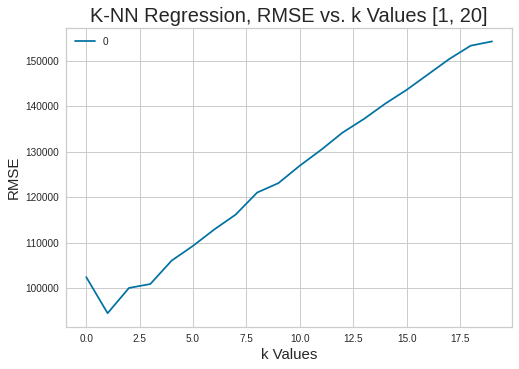

In [ ]:
# plotting the RMSE values against k values
curve = pd.DataFrame(rmse6)
curve.plot()
# label chart and axes
plt.title("K-NN Regression, RMSE vs. k Values [1, 20]", fontsize=20)
plt.xlabel("k Values", fontsize=15)
plt.ylabel("RMSE", fontsize=15)

plt.show()

In [ ]:
params = {'n_neighbors':[1,2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model6 = GridSearchCV(knn, params, cv=5).fit(x_train, y_train)
model6.best_params_

{'n_neighbors': 1}

In [ ]:
# for k = 1
model6 = neighbors.KNeighborsRegressor(n_neighbors=1).fit(x_train, y_train)
y_pred6 = model6.predict(x_test)
score6 = model6.score(x_test, y_test)

print(f"Predicted Response:\n{y_pred6}")
print(f"Accuracy Score:\n{score6}")

Predicted Response:
[1.06108e+03 1.20000e+00 0.00000e+00 ... 6.00000e+00 5.92910e+04
 1.04548e+05]
Accuracy Score:
0.9493703191596098


### k-NN Classification (7)

In [ ]:
# define data
x7 = df.select_dtypes(include='number')
y7 = df['EnergyType']

# partition the data into 75% training and 25% validation set
x_train, x_test, y_train, y_test = train_test_split(x7, y7, train_size=0.75)

clf7 = KNeighborsClassifier(p=1).fit(x_train, y_train)

# make predictions
y_pred7 = clf7.predict(x_test)
print(y_pred7)

# accuracy score
score7 = clf7.score(x_test, y_test)
print(f"Accuracy Score:\n{score7}")

['Hydro' 'Natural Gas' 'Solar' ... 'Natural Gas' 'Natural Gas' 'Solar']
Accuracy Score:
0.6829405162738497
